In [1]:
import numpy as np
import pandas as pd
from itertools import chain, combinations
import l0learn
import l0bnb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
import sys
import os
print(os.getcwd())
sys.path.append("..")
from interpretDistill.iD import Node, distillFIGSRegressor

/home/mattyshen/interpretableDistillation/notebooks


In [2]:
import pandas as pd
from itertools import chain, combinations

n_samps = 100
X = pd.DataFrame(np.random.choice([0, 1], size=(n_samps, 4)), columns = ['R', 'G', 'B', 'X'])
y = np.random.rand(n_samps)

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def compute_subset_product(subset, data):
    if not subset:
        return pd.Series(1, index=data.index)
    else:
        return data[list(subset)].product(axis=1)

column_powerset = powerset(X.columns)
Chi = pd.DataFrame()


for subset in column_powerset:
    #subset_name = '{' + ','.join(str(subset)) + '}' if subset else '{}'
    Chi[subset] = compute_subset_product(subset, X)

/home/mattyshen/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [3]:
model = distillFIGSRegressor(lam = 0.01)
lasso = Lasso(fit_intercept = False, alpha = 0.01)
lasso.fit(Chi, y)
model.fit(X, y)

/home/mattyshen/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1841: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


distillFIGSRegressor(lam=0.01)

In [10]:
np.mean(np.round(lasso.predict(Chi), 6) == np.round(model.predict(X), 6))

1.0

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

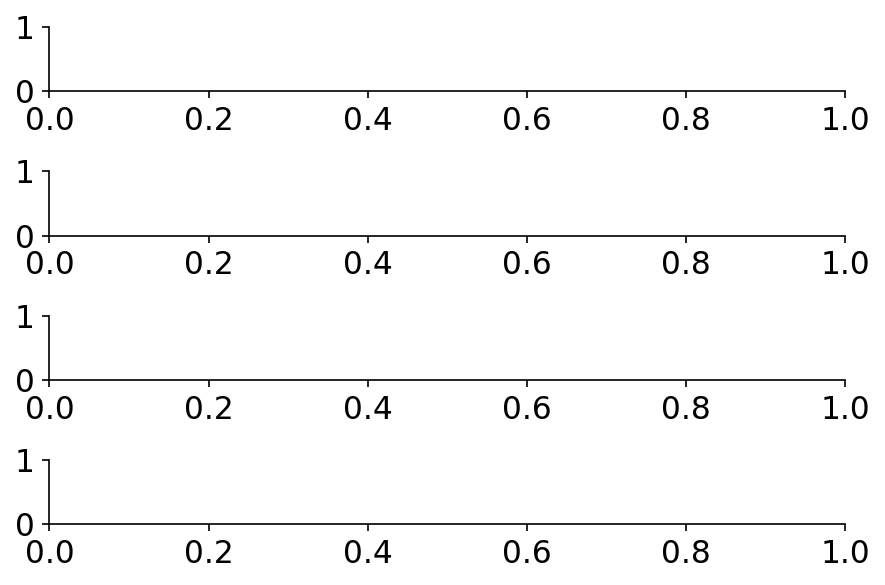

In [12]:
model.plot()

In [5]:
lasso.predict(Chi)

array([0.52727043, 0.41784545, 0.46957   , 0.46957   , 0.50344241,
       0.52727043, 0.52727043, 0.50344241, 0.47554589, 0.50344241,
       0.46957   , 0.46957   , 0.47554589, 0.46957   , 0.52727043,
       0.52727043, 0.50344241, 0.56114285, 0.47554589, 0.50344241,
       0.47554589, 0.50344241, 0.46957   , 0.46957   , 0.52727043,
       0.46957   , 0.56114285, 0.52727043, 0.46957   , 0.50344241,
       0.50344241, 0.56114285, 0.52727043, 0.45171787, 0.50344241,
       0.45171787, 0.56114285, 0.50344241, 0.56114285, 0.56114285,
       0.46957   , 0.41784545, 0.52727043, 0.52727043, 0.52727043,
       0.56114285, 0.52727043, 0.47554589, 0.52727043, 0.46957   ,
       0.47554589, 0.50941831, 0.56114285, 0.56114285, 0.50344241,
       0.46957   , 0.46957   , 0.46957   , 0.50344241, 0.47554589,
       0.47554589, 0.46957   , 0.50344241, 0.56114285, 0.50344241,
       0.46957   , 0.52727043, 0.45171787, 0.46957   , 0.50941831,
       0.50344241, 0.45171787, 0.50344241, 0.50344241, 0.46957

In [6]:
ols = LinearRegression(fit_intercept = False)
ridge = Ridge(fit_intercept = False, alpha = 0.1)
lasso = Lasso(fit_intercept = False, alpha = 0.01)
elasticnet = ElasticNet(fit_intercept = False, alpha = 0.1, l1_ratio = 0.5)

In [7]:
ols.fit(Chi, y)
ridge.fit(Chi, y)
lasso.fit(Chi, y)
elasticnet.fit(Chi, y);

In [8]:
Chi_s = Chi.loc[:, lasso.coef_ != 0]
        
Chi_s

,(),"(R,)","(X,)","(G, B)"
0,1,1,0,0
1,1,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,1,0
...,...,...,...,...
95,1,1,1,0
96,1,1,0,0
97,1,1,0,1
98,1,0,1,1


In [9]:
trees = []

for c, beta in zip(Chi_s.columns, list(filter(lambda num: num != 0, elasticnet.coef_))):
    print(c, beta)
    trees.append(split_constructor(c, beta))

() 0.4377094343548646


NameError: name 'split_constructor' is not defined

In [ ]:
def split_constructor(columns, beta):
    if len(columns) == 0:
        return Node(is_root = True,
                   feature = 'Intercept',
                   value = beta,
                   threshold = 0.5,
                   left = None,
                   right = None)
    elif len(columns) == 1:
        return Node(is_root = True,
                   feature = columns[0],
                   value = beta,
                   threshold = 0.5,
                   left = None,
                   right = None)
    else:
        n = Node(is_root = True,
                   feature = columns[0],
                   value = 0,
                   threshold = 0.5,
                   left = None)
        n.setattrs(right = split_constructor(columns[1:], beta))
        return n

In [ ]:
trees

In [ ]:
trees[3].right.value

In [ ]:
hi = np.array([[0]])
hi[0,0]

In [ ]:
hi.value